In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('temper.dat', header=None, sep=' ')
data.columns = ['time', 'temperature', 'pressure', 'kinetic', 'potential','mechanic']
display(data)

,time,temperature,pressure,kinetic,potential,mechanic
0,1.0,499.655640,191.912781,6231.550781,-552.629395,5678.921387
1,2.0,499.657776,191.911163,6231.577637,-552.652649,5678.924805
2,3.0,499.660675,191.908279,6231.613770,-552.692322,5678.921387
3,4.0,499.665070,191.904236,6231.668457,-552.746277,5678.922363
4,5.0,499.670776,191.899323,6231.739746,-552.816895,5678.922852
...,...,...,...,...,...,...
4995,4996.0,557.938721,301.573212,6958.439453,-1283.863281,5674.576172
4996,4997.0,557.773376,302.079498,6956.377441,-1281.884033,5674.493164
4997,4998.0,557.611633,302.568817,6954.359863,-1280.026123,5674.333984
4998,4999.0,557.453979,303.064758,6952.393555,-1278.099365,5674.293945


In [11]:
t = data.iloc[:,0]
temp = data.iloc[:,1]
pr  = data.iloc[:,2]
kin = data.iloc[:,3]
pot = data.iloc[:,4]
mec = data.iloc[:,5]

In [18]:
#means after equilibration zone
data_mean = data.loc['1500':len(t)]
display(data_mean)
t2 = data_mean.iloc[:,0]
temp_mean = sum(data_mean.iloc[:,1])/len(data_mean.iloc[:,1])
pr_mean = sum(data_mean.iloc[:,2])/len(data_mean.iloc[:,2])
kin_mean = sum(data_mean.iloc[:,3])/len(data_mean.iloc[:,3])
pot_mean = sum(data_mean.iloc[:,4])/len(data_mean.iloc[:,4])
mec_mean = sum(data_mean.iloc[:,5])/len(data_mean.iloc[:,5])
print('mean temperature: {:.2f} K'.format(temp_mean))
print('mean pressure: {:.2f} bar'.format(pr_mean))
print('mean kinetic energy: {:.2f} J'.format(kin_mean))
print('mean potential energy: {:.2f} J'.format(pot_mean))
print('mean mechanical energy: {:.2f} J'.format(mec_mean))

,time,temperature,pressure,kinetic,potential,mechanic
1500,1501.0,542.979248,355.798462,6771.869141,-1095.380859,5676.488281
1501,1502.0,543.031189,355.603760,6772.517090,-1096.068848,5676.448242
1502,1503.0,543.088867,355.380951,6773.236816,-1096.908203,5676.328613
1503,1504.0,543.151794,355.134521,6774.021484,-1097.852783,5676.168945
1504,1505.0,543.220459,354.903870,6774.877930,-1098.586670,5676.291016
...,...,...,...,...,...,...
4995,4996.0,557.938721,301.573212,6958.439453,-1283.863281,5674.576172
4996,4997.0,557.773376,302.079498,6956.377441,-1281.884033,5674.493164
4997,4998.0,557.611633,302.568817,6954.359863,-1280.026123,5674.333984
4998,4999.0,557.453979,303.064758,6952.393555,-1278.099365,5674.293945


mean temperature: 550.47 K
mean pressure: 326.69 bar
mean kinetic energy: 6865.23 J
mean potential energy: -1189.74 J
mean mechanical energy: 5675.49 J


Text(0, 0.5, 'Temperature (K)')

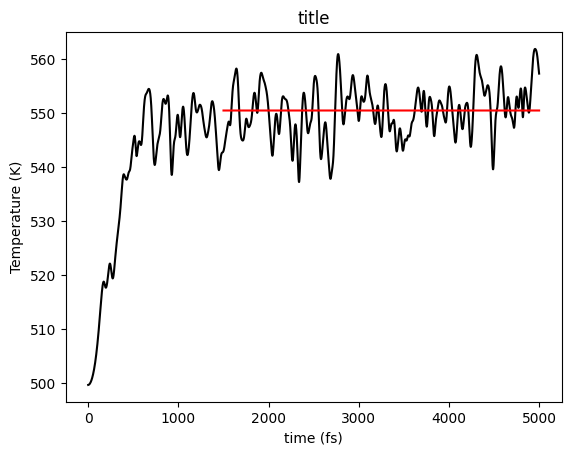

In [13]:
plt.plot(t,temp,'-', color ='black')
plt.plot(t2,temp_mean*np.ones(len(t2)),'-',color = 'red')
plt.title('title')
plt.xlabel('time (fs)')
plt.ylabel('Temperature (K)')

Text(0, 0.5, 'Kinetic energy (J)')

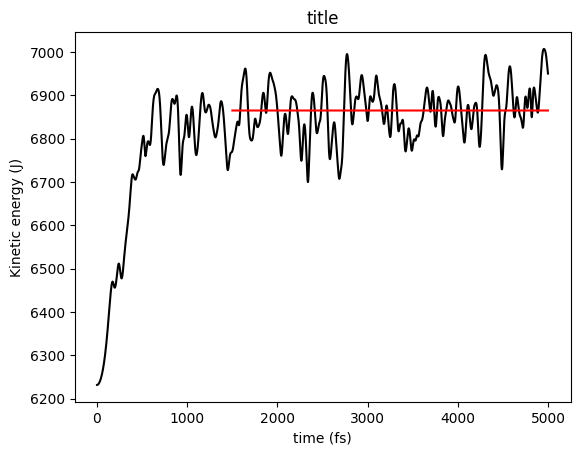

In [14]:
plt.plot(t,kin,'-', color ='black')
plt.plot(t2,kin_mean*np.ones(len(t2)),'-',color = 'red')
plt.title('title')
plt.xlabel('time (fs)')
plt.ylabel('Kinetic energy (J)')

Text(0, 0.5, 'Pressure (bar)')

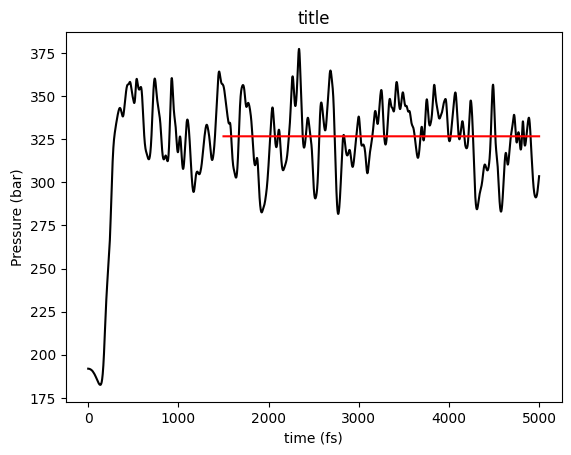

In [15]:
plt.plot(t,pr,'-', color ='black')
plt.plot(t2,pr_mean*np.ones(len(t2)),'-',color = 'red')
plt.title('title')
plt.xlabel('time (fs)')
plt.ylabel('Pressure (bar)')

Text(0, 0.5, 'Potential energy (J)')

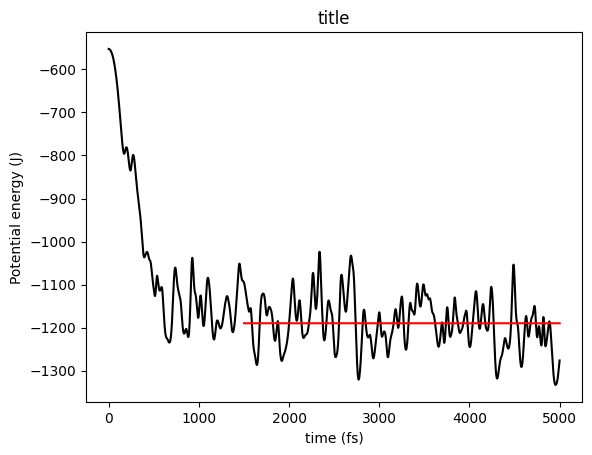

In [16]:
plt.plot(t,pot,'-', color ='black')
plt.plot(t2,pot_mean*np.ones(len(t2)),'-',color = 'red')
plt.title('title')
plt.xlabel('time (fs)')
plt.ylabel('Potential energy (J)')

Text(0, 0.5, 'Hamiltonian = kinetic + potential (J)')

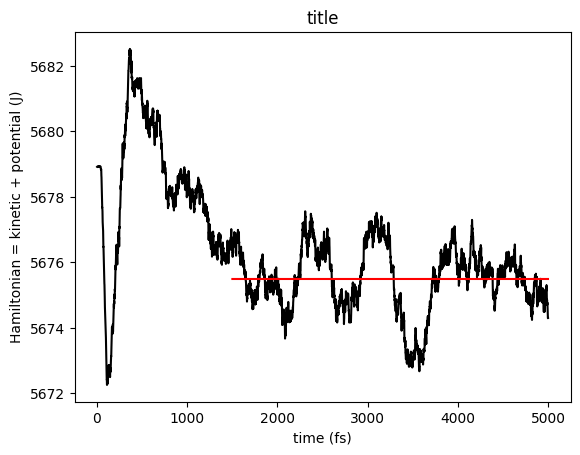

In [17]:
plt.plot(t,mec,'-', color ='black')
plt.plot(t2,mec_mean*np.ones(len(t2)),'-',color = 'red')
plt.title('title')
plt.xlabel('time (fs)')
plt.ylabel('Hamiltonian = kinetic + potential (J)')